## Neural Networks

**Student:** Guillem Amat (ga98), Sebastian Soriano ()

### Importing Packages

In [43]:
# Usual packages
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Torch packages
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

<br>

### Q1: Multi-Layer Neural Network

Build a multi-layer neural network using PyTorch. Use it to solve the XOR classification problem generated by gen_xor.py. Visualize the decision surface using matplotlib, with the training data overlaid as in Tensorflow Playground.

**XOR Data**

In [3]:
def gen_xor():
    """Generate XOR data."""
    nobs_per = 50

    X = np.vstack((
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 0]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 0]],
    ))
    Y = np.hstack((
        np.zeros((2 * nobs_per,)),
        np.ones((2 * nobs_per,)),
    ))
    return X, Y

In [4]:
X, y = gen_xor()

<br>

**Neural Network Architecture**

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5,  2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [18]:
# Initializing Neural Network
XOR_net = Net()

In [19]:
# Choosing our Loss Function. We could also use nn.MSELoss or nn.BCELoss.
criterion = nn.CrossEntropyLoss()

In [20]:
# Choosing Adam to be our optimizer
optimizer = torch.optim.Adam(XOR_net.parameters(), lr=0.0025)

<br>

**Training Neural Network**

In [21]:
# We will divide the data into a training and a test set
X, y = torch.from_numpy(X), torch.from_numpy(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, y_train.shape

(torch.Size([160, 2]), torch.Size([160]))

In [69]:
for epoch in tqdm(range(1000)):
    # Set all gradients to zero
    optimizer.zero_grad()
    
    # Propagate the network forward 
    y_hat = XOR_net(X_train.float())
    
    # Print loss
    if epoch % 1000 == 0:
        print(loss)
    
    # Get the loss and take a gradient step
    loss = criterion(y_hat, y_train.long())
    loss.backward()
    optimizer.step()

tensor(0.3445, grad_fn=<NllLossBackward>)



In [56]:
with torch.no_grad():
    # Load model
    XOR_net.eval()
    
    # Propagate the network forward
    y = XOR_net(X_test.float())
    loss = criterion(y, y_test.long())
    
    # Get predictions
    predictions = torch.argmax(y, dim=1)

In [65]:
X_test[:, 0]

tensor([ 1.1858,  0.9593, -0.2406,  1.0986,  0.0977,  0.3339,  0.8247,  0.5123,
         0.9750, -0.0554,  0.9230,  1.1356,  0.9610,  1.1899,  1.0936,  0.6784,
         0.7222,  1.4953,  1.1916,  0.9898, -0.0612, -0.3342,  0.1599,  0.9926,
         0.8687,  1.0493,  1.0628,  0.8982, -0.1142,  0.2986, -0.1076, -0.3683,
         0.8680,  1.1965,  1.5099, -0.1033,  0.5305,  0.0647,  0.9785,  0.9911],
       dtype=torch.float64)

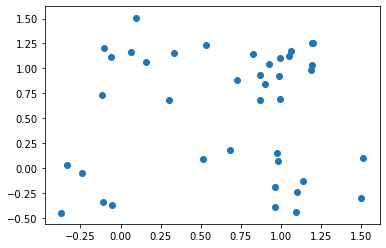

In [67]:
plt.scatter(X_test[:, 0], X_test[:, 1])

In [59]:
(predictions == y_test)

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True])